## Implementing a CNN with six layers to classify the Fashion MNIST dataset

In [3]:
!pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.7 kB ? eta -:--:--
     ------------------------------- ------ 41.0/48.7 kB 991.0 kB/s eta 0:00:01
     ------------------------------- ------ 41.0/48.7 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 246.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.2 MB 1.9 MB/s eta 0:03:21
   ---------------------------------------- 0.1/385.2 MB 1.7 MB/s eta 0:03:41
   ---------------------------------------- 0.2/385.2 MB 1.1 MB/s eta 0:05:36
   ---------------------------------------- 0.2/385.2 MB 1.4 MB/s eta 0:04:42
   ---------------------------------------- 0.2/385.2 MB 1.4 MB/s eta 0:04:42
   ---------------------------------------- 0.4/385.2 MB 1.5 MB/s eta 0:04:13
   ---------------------------------------- 0.5/385.2 MB 1.9 MB/s eta 0:03:2

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


In [27]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [28]:
# Reshape the data for CNN input
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [25]:
# Define the CNN model
model = keras.Sequential([
    # First Convolutional Layer
    # 32 filters, 3x3 kernel size, ReLU activation
    # Input shape is 28x28 with 1 channel (grayscale)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),  # Max pooling to reduce spatial dimensions
    
    # Second Convolutional Layer
    # 64 filters, 3x3 kernel size, ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third Convolutional Layer
    # 64 filters, 3x3 kernel size, ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten Layer
    # Converts the 2D feature maps to 1D feature vectors
    layers.Flatten(),
    
    # First Dense Layer
    # 64 neurons, ReLU activation
    layers.Dense(64, activation='relu'),
    
    # Output Dense Layer
    # 10 neurons (one for each class), softmax activation for multi-class classification
    layers.Dense(10, activation='softmax')
])

In [29]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
# Print model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.7372 - loss: 0.7166 - val_accuracy: 0.8554 - val_loss: 0.3926
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8696 - loss: 0.3570 - val_accuracy: 0.8796 - val_loss: 0.3342
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8904 - loss: 0.2959 - val_accuracy: 0.8886 - val_loss: 0.3045
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9037 - loss: 0.2583 - val_accuracy: 0.8957 - val_loss: 0.2839
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9127 - loss: 0.2352 - val_accuracy: 0.9037 - val_loss: 0.2686
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9216 - loss: 0.2123 - val_accuracy: 0.9067 - val_loss: 0.2647
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9323 - loss: 0.1862 - val_accuracy: 0.9138 - val_loss: 0.2533
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9377 -

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 4ms/step - accuracy: 0.8978 - loss: 0.3011

Test accuracy: 0.8978000283241272


In [14]:
# Make predictions for two images
predictions = model.predict(x_test[:2])
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


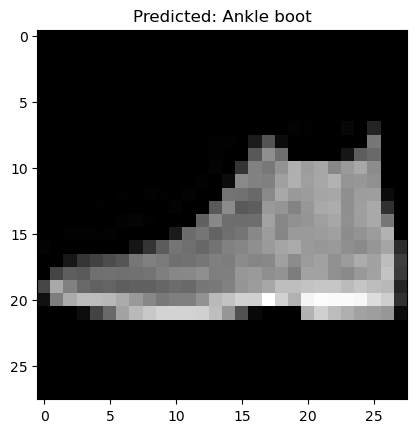

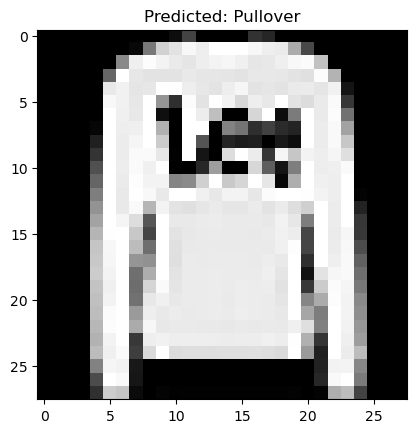

In [15]:
for i in range(2):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}")
    plt.show()

## Implement the same CNN in R using the keras package:

In [ ]:
library(keras)
library(tensorflow)
library(reticulate)

# Load the Fashion MNIST dataset
fashion_mnist <- dataset_fashion_mnist()

# Normalize pixel values to be between 0 and 1
x_train <- fashion_mnist$train$x / 255
x_test <- fashion_mnist$test$x / 255
y_train <- fashion_mnist$train$y
y_test <- fashion_mnist$test$y

# Reshape the data for CNN input
x_train <- array_reshape(x_train, c(nrow(x_train), 28, 28, 1))
x_test <- array_reshape(x_test, c(nrow(x_test), 28, 28, 1))

# Define the CNN model
model <- keras_model_sequential() %>%
  layer_conv_2d(filters = 32, kernel_size = c(3, 3), activation = 'relu', input_shape = c(28, 28, 1)) %>%
  layer_max_pooling_2d(pool_size = c(2, 2)) %>%
  layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = 'relu') %>%
  layer_max_pooling_2d(pool_size = c(2, 2)) %>%
  layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = 'relu') %>%
  layer_flatten() %>%
  layer_dense(units = 64, activation = 'relu') %>%
  layer_dense(units = 10, activation = 'softmax')

# Compile the model
model %>% compile(
  optimizer = 'adam',
  loss = 'sparse_categorical_crossentropy',
  metrics = c('accuracy')
)

# Train the model
history <- model %>% fit(
  x_train, y_train,
  epochs = 10,
  validation_split = 0.2
)

# Evaluate the model
eval_result <- model %>% evaluate(x_test, y_test)
cat('Test accuracy:', eval_result$accuracy, '\n')

# Make predictions for two images
predictions <- model %>% predict(x_test[1:2, , , ])
class_names <- c('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

for (i in 1:2) {
  image <- x_test[i, , , ]
  predicted_class <- which.max(predictions[i, ]) - 1
  cat('Predicted class:', class_names[predicted_class + 1], '\n')
  
  # Plot the image (Note: You may need to use a different plotting library in R)
  plot(as.raster(image[,,1], max = 1))
  title(paste("Predicted:", class_names[predicted_class + 1]))
}